# Intégration numérique

### Importation de packages pour Python

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Les méthodes d'intégration numérique

Soient $a$ et $b$ deux réels tels que $a < b$ et $f$ une fonction continue sur $[a,b]$. Le but de ce TP est d'implémenter les méthodes d'intégration vu en cours: la méthode des rectangles, la méthode du point milieu, la méthode des trapèzes et la méthode de Simpson. Ces méthodes donnent une approximation de l'intégrale
$$
I(f,a,b) = \int_a^b f(x)dx.
$$
On s'intéressera en particulier aux erreurs d'approximation obtenues.

L'intégration numérique se fera sur l'intervalle $[a,b]$, que l'on discrétise comme une suite de sous-intervalles $[x_{j-1},x_j]$ dont la longueur est uniforme. En particulier, pour tout $n\geq 1$, on pose
$$
x_j = a + j\frac{b-a} n = a + jh, \quad 0\leq j\leq n,
$$
où l'on note $h = \frac{b-a}n$.

Afin de tester les méthodes, on utilisera l'intégrale continue suivante, dont on calcule explicitement la valeur,
$$
I_e = \int_a^b\cos(x) dx = \left[ \sin(x) \right]^b_a = \sin(b) - \sin(a).
$$

In [16]:
def f_ex(x):
    return np.cos(x)
def g_ex(x):
    return np.sin(x)

### Méthode des rectangles

La méthodes des rectangles consiste à utiliser la formule suivante d'approximation de l'intégrale $I(f,a,b)$
$$
I_{n,\textrm{Rect},1}(f,a,b) =  \dfrac{b-a}{n}\sum_{j = 1}^{n} f(x_{j-1}),
$$
pour les rectangles à gauche, et
$$
I_{n,\textrm{Rect},2}(f,a,b) =  \dfrac{b-a}{n}\sum_{j = 1}^{n} f(x_{j}),
$$
pour les rectangles à droite.

>**A faire :** Écrire une fonction **Rect** qui prendra en argument d'entrée la fonction $f$ dont on veut calculer l'intégrale numérique, les scalaires $a$ et $b$ correspondant aux bornes de l'intégrale et enfin l'entier $n$ qui correspond aux nombres de sous-intervalles. La fonction devra rendre l'approximation de l'intégrale à l'aide de la méthode des rectangles à gauche et à droite. On testera cette fonction en approximant $I_e$ avec $a=0$, $b=2$ et $n = 10$.

In [17]:
def Rect(f,a,b,n):
    h = (b-a)/n
    x = np.linspace(a,b,n)
    y = f(x)
    return h*np.sum(y)

### Méthode du point milieu

La méthodes du point milieu consiste à utiliser la formule suivante d'approximation de l'intégrale $I(f,a,b)$
$$
I_{n,\textrm{Milieu}}(f,a,b) =  \dfrac{b-a}{n}\sum_{j = 1}^{n} f(x_{j-1/2}),
$$
où l'on note
$$
x_{j-1/2} = \frac{x_{j-1} + x_j}2.
$$

>**A faire :** Écrire une fonction **Milieu** qui prendra en argument d'entrée la fonction $f$ dont on veut calculer l'intégrale numérique, les scalaires $a$ et $b$ correspondant aux bornes de l'intégrale et enfin l'entier $n$ qui correspond aux nombres de sous-intervalles. La fonction devra rendre l'approximation de l'intégrale à l'aide de la méthode du point milieu. On testera cette fonction en approximant $I_e$ avec $a=0$, $b=2$ et $n = 10$.

In [18]:
def Milieu(f,a,b,n):
    h = (b-a)/n
    x = np.linspace(a,b,n)
    y = f(x+h/2)
    return h*np.sum(y)

### Méthode des trapèzes

La méthodes des trapèzes consiste à utiliser la formule suivante d'approximation de l'intégrale $I(f,a,b)$
$$
I_{n,\textrm{Trapèzes}}(f,a,b) =  \dfrac{b-a}{n}\sum_{j = 1}^{n} \frac{f(x_{j-1}) + f(x_{j})}2,
$$
que l'on peut encore écrire
$$
I_{n,\textrm{Trapèzes}}(f,a,b) = \frac12\left(I_{n,\textrm{Rect},1}(f,a,b) + I_{n,\textrm{Rect},2}(f,a,b) \right).
$$

>**A faire :** Écrire une fonction **Trapezes** qui prendra en argument d'entrée la fonction $f$ dont on veut calculer l'intégrale numérique, les scalaires $a$ et $b$ correspondant aux bornes de l'intégrale et enfin l'entier $n$ qui correspond aux nombres de sous-intervalles. La fonction devra rendre l'approximation de l'intégrale à l'aide de la méthode des trapèzes. On testera cette fonction en approximant $I_e$ avec $a=0$, $b=2$ et $n = 10$.

In [19]:
def Trapezes(f,a,b,n):
    h = (b-a)/n
    x = np.linspace(a,b,n)
    y = f(x)
    return h*(np.sum(y)-y[0]/2-y[-1]/2)

### Méthode de Simpson

La méthodes du point milieu consiste à utiliser la formule suivante d'approximation de l'intégrale $I(f,a,b)$
$$
I_{n,\textrm{Simpson}}(f,a,b) =  \dfrac{b-a}{n}\sum_{j = 1}^{n} \frac 1 6 \left(f(x_{j-1}) + 4 f(x_{j-1/2})+ f(x_{j}) \right),
$$
que l'on peut encore écrire
$$
I_{n,\textrm{Simpson}}(f,a,b) = \frac 1 3 \left(I_{n,\textrm{Trapèzes}}(f,a,b)+ 2I_{n,\textrm{Milieu}}(f,a,b)\right).
$$

>**A faire :** Écrire une fonction **Simpson** qui prendra en argument d'entrée la fonction $f$ dont on veut calculer l'intégrale numérique, les scalaires $a$ et $b$ correspondant aux bornes de l'intégrale et enfin l'entier $n$ qui correspond aux nombres de sous-intervalles. La fonction devra rendre l'approximation de l'intégrale à l'aide de la méthode de Simpson. On testera cette fonction en approximant $I_e$ avec $a=0$, $b=2$ et $n = 10$.

In [24]:
def Simpson(f,a,b,n):
    return 1/3*(Trapezes(f,a,b,n)+2*Milieu(f,a,b,n))

### Analyse de l'erreur d'approximation et ordre des méthodes

On se propose à présent d'analyser l'erreur d'approximation commise par chacune des méthodes précédentes. L'analyse de cette erreur permettra notamment d'évaluer numériquement l'ordre des méthodes. On considère l'erreur d'approximation suivante
$$
e(n) = |I(f_{\textrm{ex}},a,b) - I_{n,\textrm{Méthode}}(f_{\textrm{ex}},a,b)|,
$$
où $I_{n,\textrm{Méthode}}(f,a,b)$ correspond à l'approximation de $I(f,a,b)$ obtenue avec une des méthodes que l'on a implémentées. L'ordre d'une méthode est défini comme étant le scalaire $p$ qui vérifie
$$
e(n) \underset{n\rightarrow\infty}{\sim} n^{-p}.
$$
Afin d'évaluer $p$, on va calculer
$$ \log(e(n)) \underset{n\rightarrow\infty}{\sim} -p\log(n),$$
et il suffira d'établir la pente de la courbe $(x,y) = (\log(n),\log(e(n))$ pour trouver $p$.


>**A faire :** Tracer sur une même figure les courbes $(\log(n),\log(e(n))$ pour les différentes méthodes d'intégration avec $a = 0$, $b = 10$ et identifier les ordres des méthodes. On prendre $n$ allant de $100$ jusqu'à $1000$. On pourra utiliser la fonction **plt.loglog** pour le tracer.

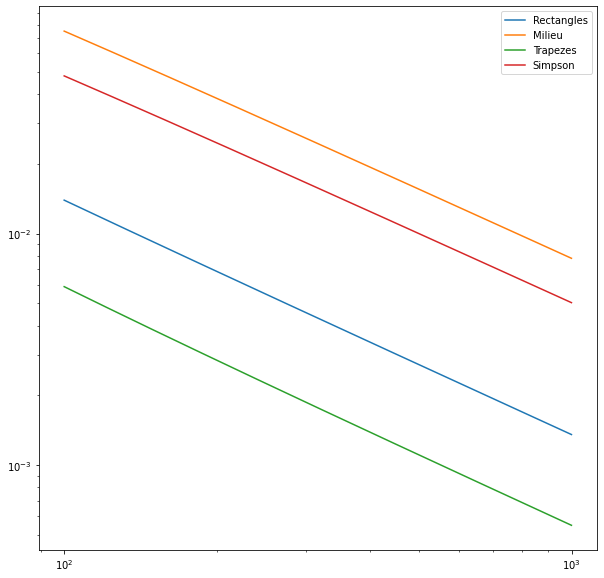

In [25]:
# plot the error (log(n), log(e(n))), for each method
errRect = []
errMilieu = []
errTrapezes = []
errSimpson = []
n = np.arange(100,1000)
for i in n:
    errRect.append(np.abs(Rect(f_ex,0,10,i)-g_ex(10)))
    errMilieu.append(np.abs(Milieu(f_ex,0,10,i)-g_ex(10)))
    errTrapezes.append(np.abs(Trapezes(f_ex,0,10,i)-g_ex(10)))
    errSimpson.append(np.abs(Simpson(f_ex,0,10,i)-g_ex(10)))

plt.figure(figsize=(10,10))
plt.loglog(n,errRect,label='Rectangles')
plt.loglog(n,errMilieu,label='Milieu')
plt.loglog(n,errTrapezes,label='Trapezes')
plt.loglog(n,errSimpson,label='Simpson')
plt.legend()
plt.show()


## Approximation de la moyenne d'un signal aléatoire

L'objectif de cette section est d'évaluer une approximation de l'intégrale suivante
$$
m(t) = \frac 1 t \int_0^t s(\tau)d\tau, \quad t\in [0,T],
$$
pour $T>0$ et où $s$ est un signal aléatoire que l'on va simuler à l'aide de la fonction **Signal** ci-dessous (dont il n'est pas nécessaire de préciser les arguments d'entrée). On remarque que $T$ correspond alors à l'argument **T_max** qui est égal à 5.

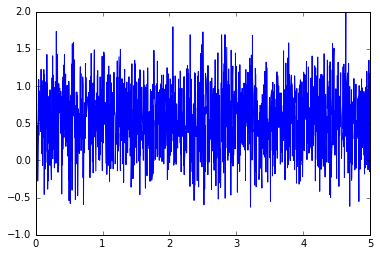

In [34]:
def Signal(n = 2000, T_max = 5, Amp_moy = 1, Amp_sig = 1):
    T_acquis = np.sort(np.random.uniform(0,T_max,size=n))
    Moy = np.random.uniform(-Amp_moy,Amp_moy,size=1)
    Sigma = np.random.uniform(0,Amp_sig,size=1)
    return np.random.normal(Moy,Sigma,size=n), T_acquis

s,T = Signal()
plt.plot(T,s)

Il est important de préciser que le signal est acquis en des temps qui ne sont pas uniformément répartis sur l'intervalle $[0,T]$. Il n'est donc pas envisageable d'utiliser la méthode du point milieu ou la méthode de Simpson qui requièrent d'avoir accès à une valeur intermédiaire (au milieu). On peut donc mettre en oeuvre la méthode des rectangles ou la méthode des trapèzes. Sachant que la méthode des trapèzes est plus précise, c'est cette dernière que l'on va mettre en oeuvre pour calculer l'intégrale. Dans le cas de points $(x_j)_{0\leq j\leq n}$ qui ne sont pas équirépartis sur $[0,T]$, la méthode des trapèzes s'écrit
$$
I_{n,\textrm{Trapèzes non-équis}}(f,a,b) = \sum_{j = 1}^{n} \frac{f(x_{j-1}) + f(x_{j})}2 (x_j - x_{j-1}),
$$

>**A faire :** Écrire une fonction **Trapeze_Nequi** permettant de mettre en oeuvre la méthode des trapèzes pour calculer l'intégrale d'une fonction $f$ en des points qui ne sont pas équirépartis. Cette fonction prendra en argument d'entrée le vecteur $F$ tel que $F_j = f(x_j)$, pour $0\leq j\leq n$, ainsi que le vecteur $X$ des points $(x_j)_{0\leq j\leq n}$. Elle donnera en sortie une approximation de l'intégrale de $f$ sur l'intervalle $[x_0,x_n]$.

In [35]:
def Trapeze_Nequi(F,X):
    pass

>**A faire :** Tracer, sur une même figure, le signal $s$ que vous aurez simulé ainsi $m$ que vous calculerez grâce à une approximation de l'intégrale de $s$ obtenue par la méthode des trapèzes.